# Submission 3 (Applied Statistics)
Gargeya Sharma (220278025) MSc Artificial Intelligence

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot

### Question 1

In [2]:
N = [5,10,50]
k = 3
v_size = 100000

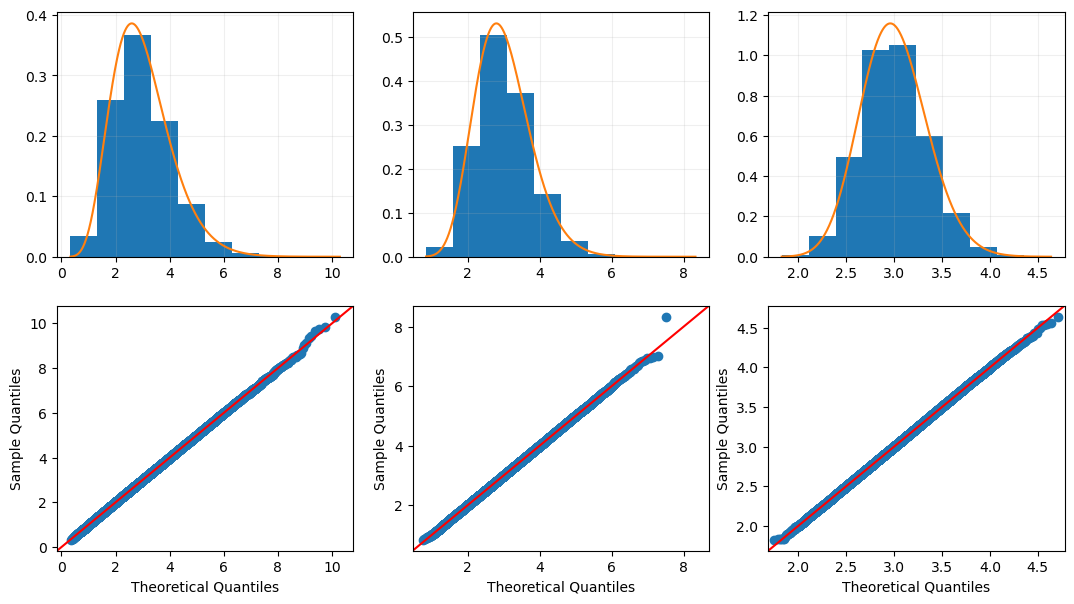

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(13,7))
j = -1
for n in N:
    j+=1
    arr = np.zeros((v_size, n))
    for i in range(n):
        r = stats.chi2.rvs(df=k, size=v_size)
        arr[:, i] = r
    sample_means = np.average(arr,axis=1)
    a = (n*k*0.5)
    x_values = np.linspace(np.min(sample_means), np.max(sample_means), v_size)
    g_dist = stats.gamma(a=a, scale=2/n)
    g_values = g_dist.pdf(x_values)
    ax[0,j].hist(sample_means, density=True)
    ax[0,j].plot(x_values, g_values)
    qqplot(sample_means, g_dist, ax=ax[1,j], line="45")
    ax[0,j].grid(True, alpha=0.2)


### Question 2

In [4]:
N = [5,10,50]
k = 3
v_size = 100000

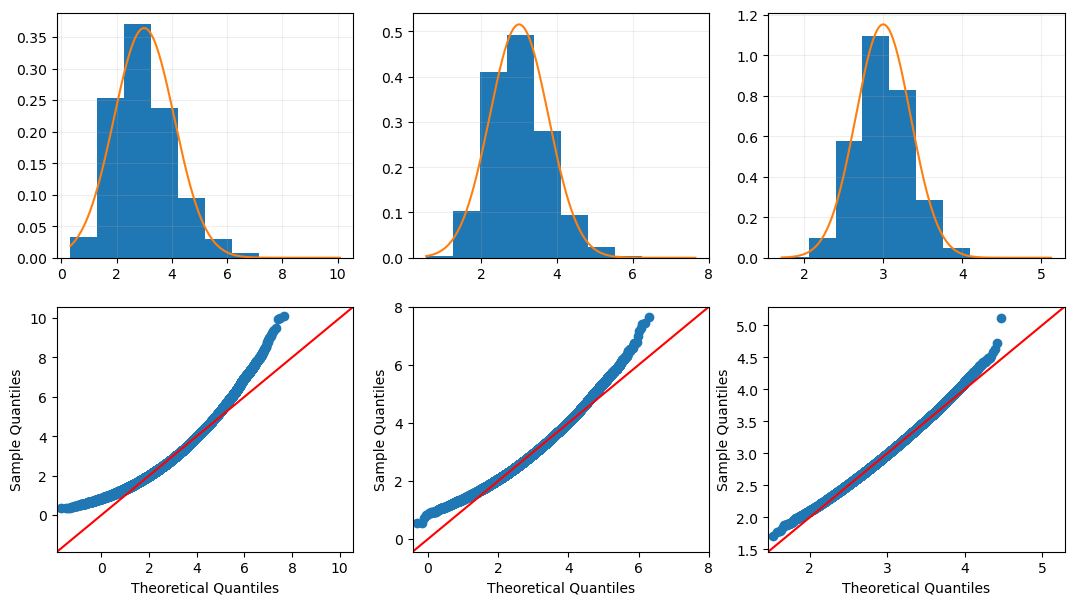

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(13,7))
j = -1
for n in N:
    j+=1
    arr = np.zeros((v_size, n))
    for i in range(n):
        r = stats.chi2.rvs(df=k, size=v_size)
        arr[:, i] = r
    sample_means = np.average(arr,axis=1)
    a = (n*k*0.5)
    x_values = np.linspace(np.min(sample_means), np.max(sample_means), v_size)
    n_dist = stats.norm(loc=k, scale=np.sqrt((2*k)/n))
    n_values = n_dist.pdf(x_values)
    ax[0,j].hist(sample_means, density=True)
    ax[0,j].plot(x_values, n_values)
    qqplot(sample_means, n_dist, ax=ax[1,j], line="45")
    ax[0,j].grid(True, alpha=0.2)

**Observations**:

As the sample size increases, our sample mean values are reaching a distribution similar to normal distribution. Look at the improving alignment of the red line and (blue) scatter points. This totally proves the working of central limit theorem in this solution. In our case, **N = 50**, which is the maximum of all the experimental values; is showing the most approximate density of samples means given by CTL compared to actual density.

### Question 3

#### Answer

**Null Hypothesis (H0)**: p hasn't changed significantly from 0.1, hence *p = 0.1*

Significance Factor: 95% ==> 0.95 

**NOTE:** I am performing one-sided test for higher sensitivity of testing the hypothesis.

In [6]:
n_of_stu_per_class = 30
n_of_classes = 4

## No. of Covid-positive students in a Class modelled as 
## Binomial Distribution for our hypothesis with p=0.1
hypothesis_dist = stats.binom(n_of_stu_per_class, 0.1)

## Sample Distribution (In this case we are working with 4 classes)
b_dist = stats.binom(n_of_stu_per_class*n_of_classes, 0.1)

## Confidence (Significance) value
alpha = 0.95 

Mathematically, we can clearly see that having 20 cases from 120 students gives us a probability larger than the probability used in the hypothesis **(p = 0.1)**. Let's check if it falls under the significant zone using *'Exact Test'*.

In [7]:
20/120

0.16666666666666666

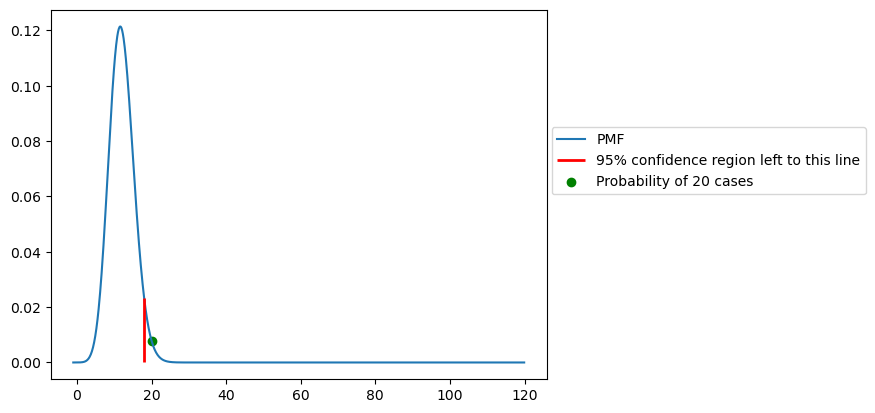

In [8]:
x_values = np.arange(b_dist.ppf(0), b_dist.ppf(1), 0.1)
plt.plot(x_values, b_dist.pmf(x_values), label="PMF")
plt.vlines([b_dist.ppf(alpha)],0, b_dist.pmf([b_dist.ppf(alpha)]), lw=2, color="r", label="95% confidence region left to this line")
plt.scatter(20, b_dist.pmf(20), color="green", label="Probability of 20 cases")
plt.legend(loc=(1.01, 0.5))
plt.show()

**Observation:**

As Clearly can be seen from the visualization, the red line lines represents the significant threshold value over which we can't accept the hypothesis. Hence, in this case, Probability of getting 20 cases is outside the significant region and conclusively we have to reject the null hypothesis. The same is shown below with code.

In [9]:
# Probability values range from (0, 1), 0 being 0%, and 1 being 100%
print(f"The probability under H0 of having observed 20 cases: {b_dist.pmf(20)}")

The probability under H0 of having observed 20 cases: 0.007825579711977095


In [10]:
## Checking the Hypothesis
if b_dist.pmf(20) < (1-alpha):
    print("Reject the Null Hypothesis")
else:
    print("We can't reject the Null Hypothesis")

Reject the Null Hypothesis


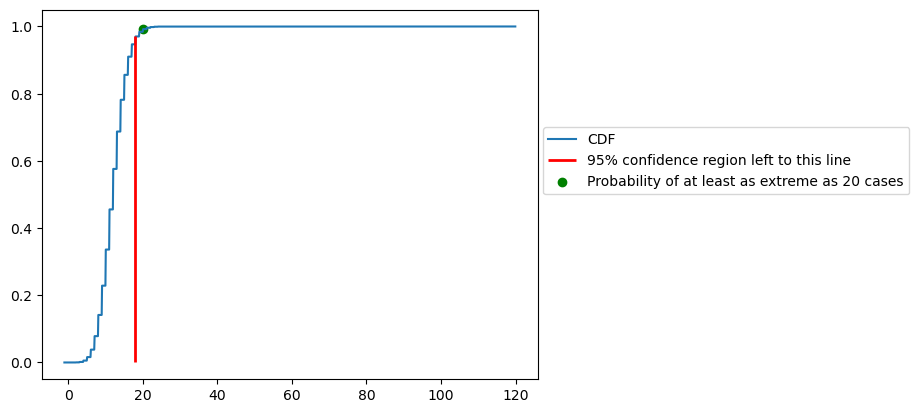

In [11]:
plt.plot(x_values, b_dist.cdf(x_values), label="CDF")
plt.vlines([b_dist.ppf(alpha)], 0, b_dist.cdf([b_dist.ppf(alpha)]), lw=2, color="r", label="95% confidence region left to this line")
plt.scatter(20, b_dist.cdf(20), color="green", label="Probability of at least as extreme as 20 cases")
plt.legend(loc=(1.01, 0.5))
plt.show()

**Observation:**

As Clearly can be seen from the visualization, the red line lines represents the significant threshold value over which we can't accept the hypothesis. Hence, in this case, Probability of getting at least as extreme as 20 cases is outside the significant region and conclusively we have to reject the null hypothesis. The same is shown below with code.

In [12]:
## cdf value is substracted from 1 because we are looking for probabilties of the values excluding 0-19
## i.e. at least 20 or more: [20,120]
print(f" The probability under H0 of having observed an outcome at least as extreme as 20 cases: {1-b_dist.cdf(19)}")

 The probability under H0 of having observed an outcome at least as extreme as 20 cases: 0.015766771960374126


In [13]:
## Checking the Hypothesis
if 1-b_dist.cdf(19) < (1-alpha):
    print("Reject the Null Hypothesis")
else:
    print("We can't reject the Null Hypothesis")

Reject the Null Hypothesis


In both the cases mentioned above, we have to reject our null hypothesis. This can be portrayed as saying that the spread of epidemic has significantly increased from the last time an experiment has been conducted (that got us the value of p=0.1).

**Extending the Research**

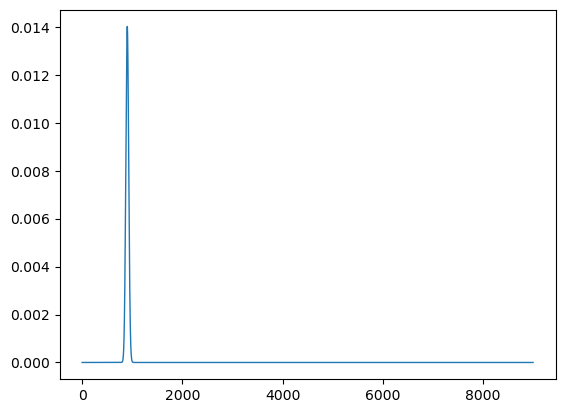

In [14]:
n_of_classes = 300
b_dist2 = stats.binom(n_of_stu_per_class*n_of_classes, 0.1)
x_values = np.arange(b_dist2.ppf(0), b_dist2.ppf(1), 0.1)

plt.plot(x_values, b_dist2.pmf(x_values), lw=1)

As shown in the visualization, taking 300 classes is giving us a distribution which is almost around the 900 value mark (10% of 9000), Not a proper representation.

Also, in exact test, we use the binomial distribution function which uses number of positive and negative cases as exponential values and it will provide us with infinite-decimally small number. Makes no sense in using values of thousands as fractions' exponential. 

In [15]:
mean, var = hypothesis_dist.stats(moments="mv")

In [16]:
std = np.sqrt(var)
mean, var, std

(array(3.), array(2.7), 1.6431676725154984)

Mathematically, we can clearly see that having 945 cases from 9000 students gives us a probability almost similar to the probability used in the hypothesis **(p = 0.1)**. Let's check if it falls under the significant zone using *'Approximate Test'*.

In [17]:
945/9000

0.105

In [18]:
N = 9000
for n in [50]:
    arr = np.zeros((N, n))
    for i in range(n):
        r = hypothesis_dist.rvs(N)
        arr[:, i] = r
    sample_means = np.average(arr,axis=1)
    print(f"Observed Sample Mean for {n} Samples ==> {sample_means.mean():.4f}")
    
sample_mean = sample_means.mean()
sample_mean = round(sample_mean, 4)

Observed Sample Mean for 50 Samples ==> 3.0016


**Answers**:


In [19]:
print("Theoretical Mean: ", mean.item())
print("Observed Sample Mean: ",sample_mean)
print(f"Took {n} number of samples with Sample Size: {N}")
print(f"Variance of Binom(30,p): ",var.item())

Theoretical Mean:  3.0
Observed Sample Mean:  3.0016
Took 50 number of samples with Sample Size: 9000
Variance of Binom(30,p):  2.7


In [20]:
z_score = abs(np.sqrt(N)*(sample_mean - mean.item())/std)
print("Z-Score: ",z_score)
p_value = stats.norm.sf(z_score)
print("P-Value: ",p_value)

Z-Score:  0.09237604307032994
P-Value:  0.4631996364449312


In [21]:
## Checking the Hypothesis
if p_value < (1-alpha):
    print("Reject the Null Hypothesis")
else:
    print("We can't reject the Null Hypothesis")

We can't reject the Null Hypothesis


As just written above, we can't reject the null hypothesis because the p-value is not out of range of our significance factor (0.95). 

So according to these results, we can say that it **might** be true p=0.1 and the pandemic's prevalence among primary students is nearly the same as what we discovered last time's study.

**Note**: Not being able to reject the null hypothesis doesn't mean that its perfectly true. It's just a hypothesis that is not completely statistically wrong.

Interestingly, both the hypothesis testing that we did with small-scale trial of exact test and large-scale trial of approximate test gave two completely different results. I think that's where the power of 'larger sample size leading to clearer representation of the population' comes up. With the small-scale trial, we had random bias playing a major role in diverting the true nature of the distribution then what we observed with large-scale trial. Central Limit Theorem indeed is super powerful in analyzing how we can  approximate actual values to observed sample values.

---